# Clean and Analyze Social Media Usage data with Python

## Description
Conduct a clean & analysis of Tweets using Python and upload your findings to your Coursera profile to showcase to potential employers. 
## Overview
I work at marketing agency that specializes in promoting brands and products on a popular social media platform. My key resposibility is analyzing the performance of different types of posts based on categories, such as health, family, food, etc. to help clients optimize their social media strategy and increase their reach and engagement.  
In this project, I use Python to automatically extract tweets posted from one or more categories, and to clean, analyze and visualize the data. I will then be making data-driven recommendations to clients to improve their social media performance. This feature will help the marketing agency deliver tweets on time, within budget, and gain fast results.

To do this, I will  set up the environment, identify the categories for the post (fitness, tech, family, beauty, etc)  process, analyze, and visualize data.
In this project, I will be using data from Twitter.
After you performinig my analysis, I will share my findings.
## Objectives:
Increase client reach and engagement
Gain valuable insights that will help improve social media performance
Achieve social media goals of the client and provide data driven recommendations

### Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons

### Generating random data for the Social Media data

In [2]:
# Firts we define categories
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

In [3]:
# Generate random data
n = 2500  # Number of data points
data = {
    'Date': pd.date_range('2017-07-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n)
}

### Loading the Data into pandas DataFrame 

In [4]:
# Creating a DataFrame
df = pd.DataFrame(data)

In [5]:
# Printing the data's lat few rows
print(df.tail())

           Date Category  Likes
2495 2024-04-30   Health   8935
2496 2024-05-01  Fitness   6243
2497 2024-05-02     Food   8929
2498 2024-05-03  Fashion   8698
2499 2024-05-04  Culture   1160


In [6]:
# Printing the dataframe information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2500 non-null   datetime64[ns]
 1   Category  2500 non-null   object        
 2   Likes     2500 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 49.0+ KB
None


In [7]:
# Printing the summary statistics
print(df.describe())

                      Date        Likes
count                 2500  2500.000000
mean   2020-12-01 12:00:00  4897.704000
min    2017-07-01 00:00:00     1.000000
25%    2019-03-17 18:00:00  2481.750000
50%    2020-12-01 12:00:00  4768.000000
75%    2022-08-18 06:00:00  7345.250000
max    2024-05-04 00:00:00  9997.000000
std                    NaN  2862.581101


In [8]:
### Count of each category
category_counts = df['Category'].value_counts()
print(category_counts)

Category
Fashion    339
Culture    334
Food       321
Family     319
Music      305
Health     304
Fitness    292
Travel     286
Name: count, dtype: int64


There are no null values, or issues tat warant data cleaning, so we go to next task

In [9]:
# Outlier Detection and Treatment (Z-score method)
z_threshold = 2
z_scores = (df['Likes'] - df['Likes'].mean()) / df['Likes'].std()
df = df[abs(z_scores) < z_threshold]
df

,Date,Category,Likes
0,2017-07-01,Travel,1840
1,2017-07-02,Family,5313
2,2017-07-03,Family,6450
3,2017-07-04,Fitness,1847
4,2017-07-05,Health,5862
...,...,...,...
2495,2024-04-30,Health,8935
2496,2024-05-01,Fitness,6243
2497,2024-05-02,Food,8929
2498,2024-05-03,Fashion,8698


In [10]:
### Visualiza and Analyze the Data

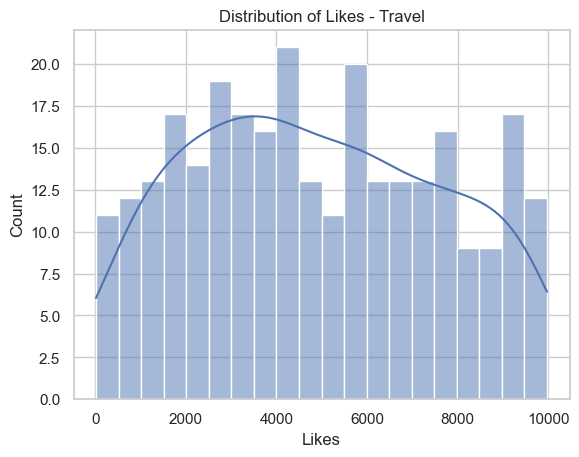

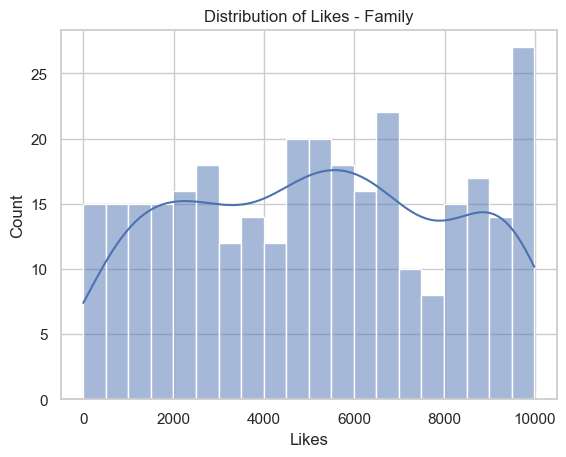

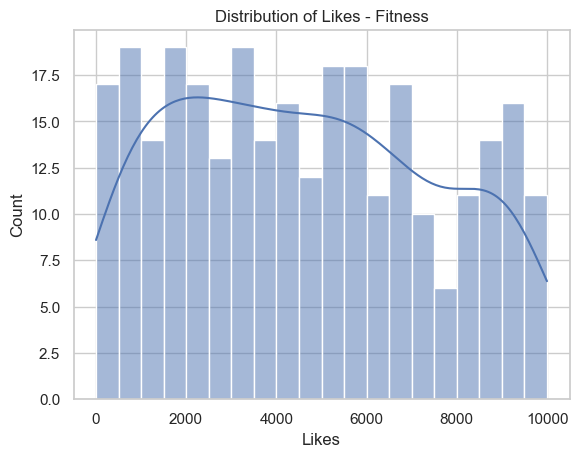

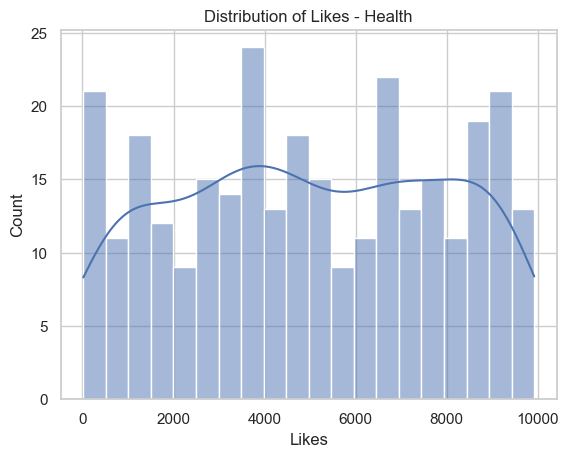

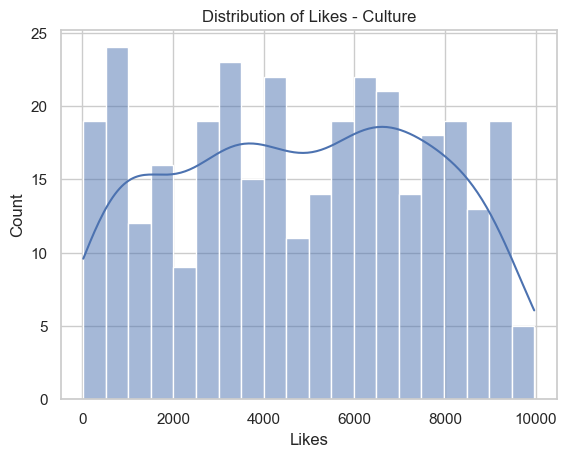

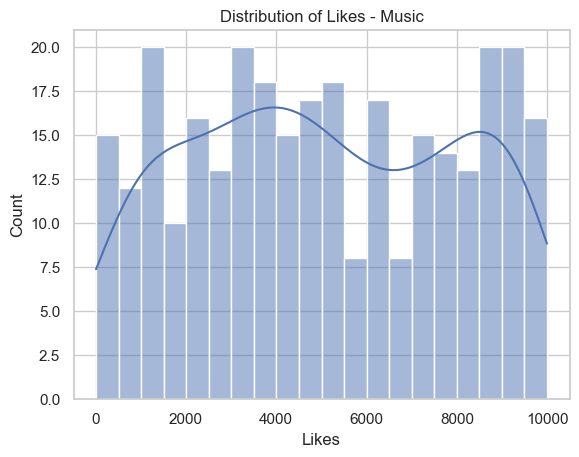

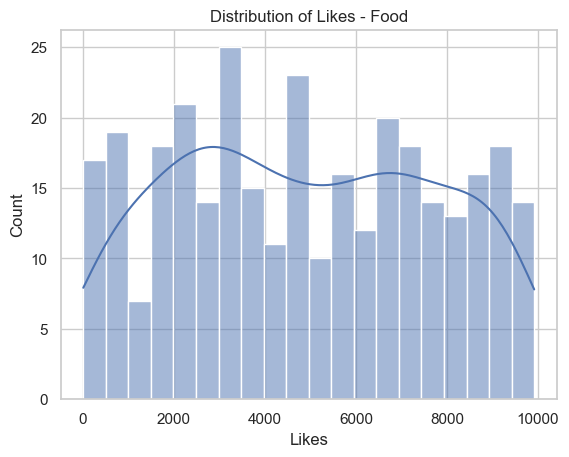

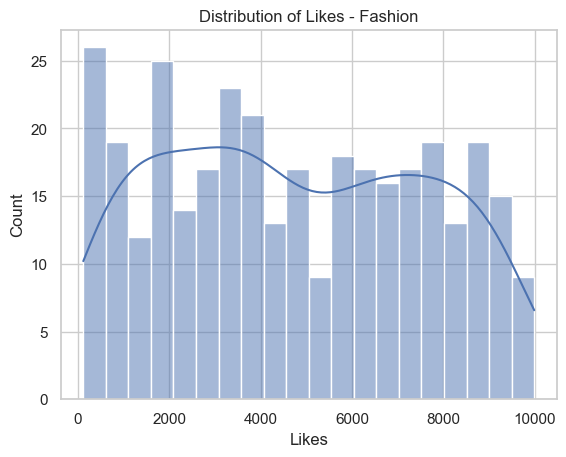

In [11]:
# Set a different theme (e.g., 'whitegrid')
sns.set_theme(style='whitegrid')

# Create separate histogram plots for Likes with facet wrap by Category using hue
categories = df['Category'].unique()
for category in categories:
    subset_df = df[df['Category'] == category]
    g = sns.histplot(subset_df['Likes'], bins=20, kde=True)
    plt.xlabel('Likes')
    plt.title(f'Distribution of Likes - {category}')
    plt.show()


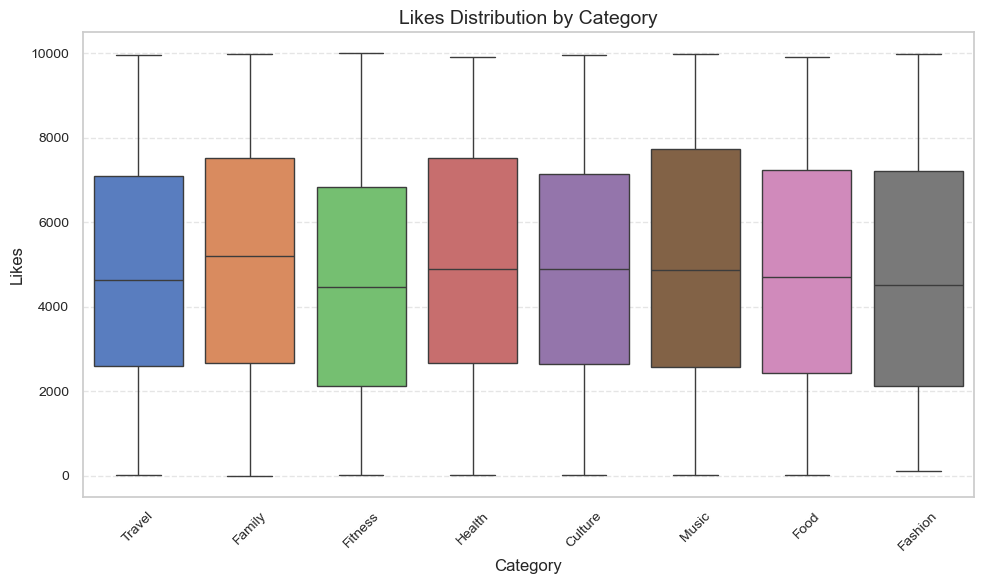

In [12]:
# Set a custom color palette
custom_palette = sns.color_palette("muted", n_colors=len(categories))

# Create a boxplot with customized theme
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Likes', data=df, palette=custom_palette, hue='Category', legend=False)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.title('Likes Distribution by Category', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()  # Adjust spacing
plt.show()

C:\Users\DENNIS\AppData\Local\Temp\ipykernel_8292\772129529.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Likes', data=df, ci=None, palette=custom_palette, hue='Category', errorbar = None)


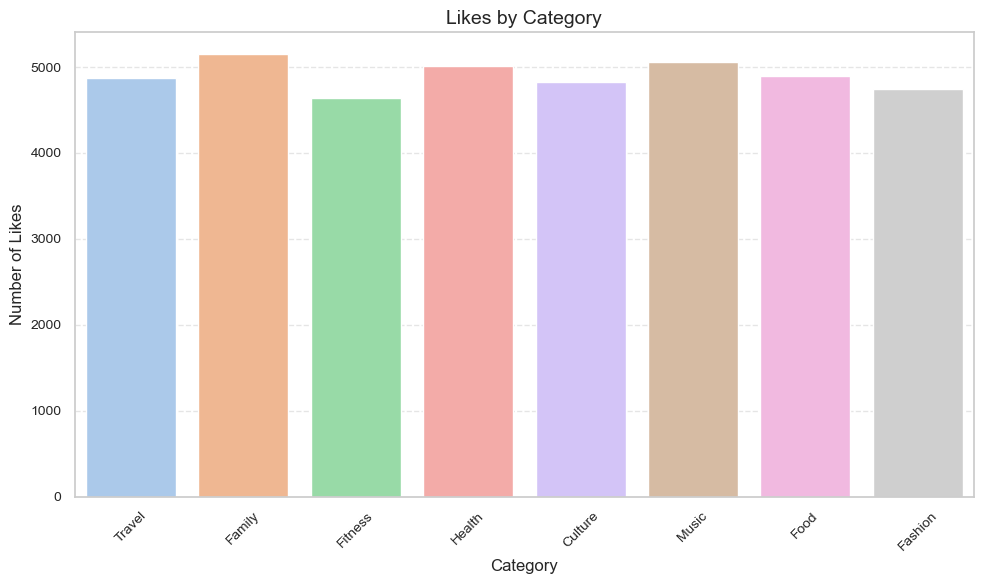

In [13]:
# Set a custom color palette (matching the number of categories)
custom_palette = sns.color_palette("pastel", n_colors=len(categories))

# Create a bar plot with customized theme
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Likes', data=df, ci=None, palette=custom_palette, hue='Category', errorbar = None)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Likes', fontsize=12)
plt.title('Likes by Category', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()  # Adjust spacing
plt.show()

In [14]:
# Statistics
mean_likes = df['Likes'].mean()
print(f"Mean Likes (Overall): {mean_likes:.2f}")

Mean Likes (Overall): 4897.70


In [15]:
category_means = df.groupby('Category')['Likes'].mean()
print("\nMean Likes by Category:")
print(category_means)


Mean Likes by Category:
Category
Culture    4825.467066
Family     5146.680251
Fashion    4740.713864
Fitness    4634.767123
Food       4893.813084
Health     5009.296053
Music      5062.242623
Travel     4869.178322
Name: Likes, dtype: float64


In [16]:
# Create a new column 'MonthYear' with the month and year only for Data Visualization
df['MonthYear'] = df['Date'].dt.to_period('M').copy()

# Print the DataFrame with the 'MonthYear' column
df

,Date,Category,Likes,MonthYear
0,2017-07-01,Travel,1840,2017-07
1,2017-07-02,Family,5313,2017-07
2,2017-07-03,Family,6450,2017-07
3,2017-07-04,Fitness,1847,2017-07
4,2017-07-05,Health,5862,2017-07
...,...,...,...,...
2495,2024-04-30,Health,8935,2024-04
2496,2024-05-01,Fitness,6243,2024-05
2497,2024-05-02,Food,8929,2024-05
2498,2024-05-03,Fashion,8698,2024-05


In [17]:
# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year
df

,Date,Category,Likes,MonthYear,Year
0,2017-07-01,Travel,1840,2017-07,2017
1,2017-07-02,Family,5313,2017-07,2017
2,2017-07-03,Family,6450,2017-07,2017
3,2017-07-04,Fitness,1847,2017-07,2017
4,2017-07-05,Health,5862,2017-07,2017
...,...,...,...,...,...
2495,2024-04-30,Health,8935,2024-04,2024
2496,2024-05-01,Fitness,6243,2024-05,2024
2497,2024-05-02,Food,8929,2024-05,2024
2498,2024-05-03,Fashion,8698,2024-05,2024


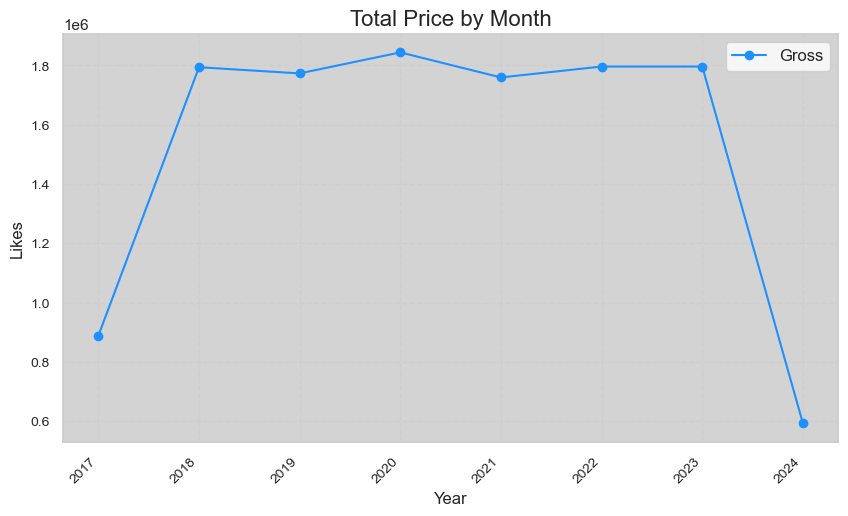

In [18]:
# Group the data by 'MonthYear' and calculate the TotalPrice for each month
monthly_data = df.groupby('Year')['Likes'].sum().reset_index()

# Convert the 'MonthYear' column to string format
monthly_data['Year'] = monthly_data['Year'].astype(str)

# Set the figure size using subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Automatic formatting to the x-axis labels when dealing with dates
fig.autofmt_xdate()

# Create a plot with markers and lines
plt.plot(monthly_data['Year'], monthly_data['Likes'], marker='o', linestyle='-', color='dodgerblue', label='Gross')

# Customize the plot
plt.title('Total Price by Month', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=12)

# Add a background color to the plot
ax.set_facecolor('lightgray')

# Add more colors and styles if needed
# Example: ax.spines['top'].set_color('none')

plt.show()  # Show the plot

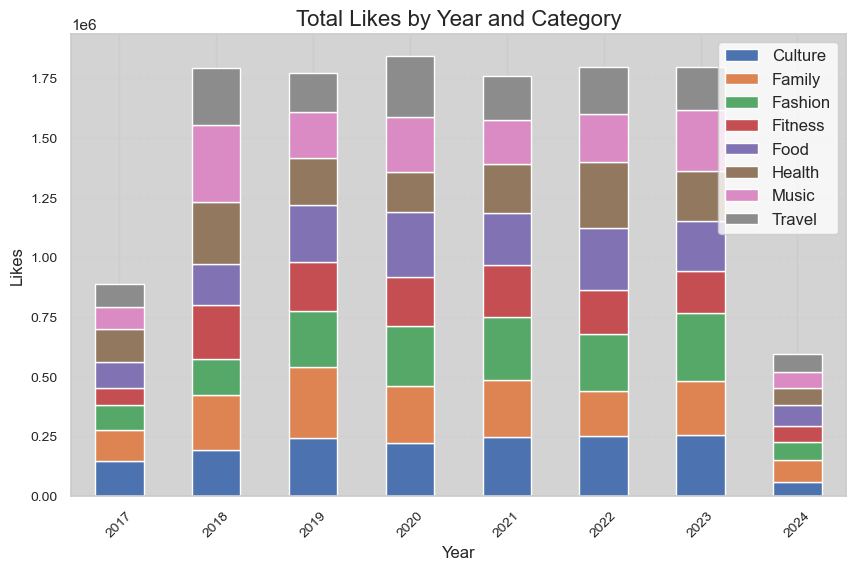

In [19]:
# Group the data by 'Year' and 'Category' and calculate the total likes for each combination
grouped_data = df.groupby(['Year', 'Category'])['Likes'].sum().reset_index()

# Pivot the data to create separate columns for each category
pivoted_data = grouped_data.pivot(index='Year', columns='Category', values='Likes')

# Set the figure size using subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot for each category
pivoted_data.plot(kind='bar', stacked=True, ax=ax)

# Customize the plot
plt.title('Total Likes by Year and Category', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=12)

# Add a background color to the plot
ax.set_facecolor('lightgray')

# Show the plot
plt.show()

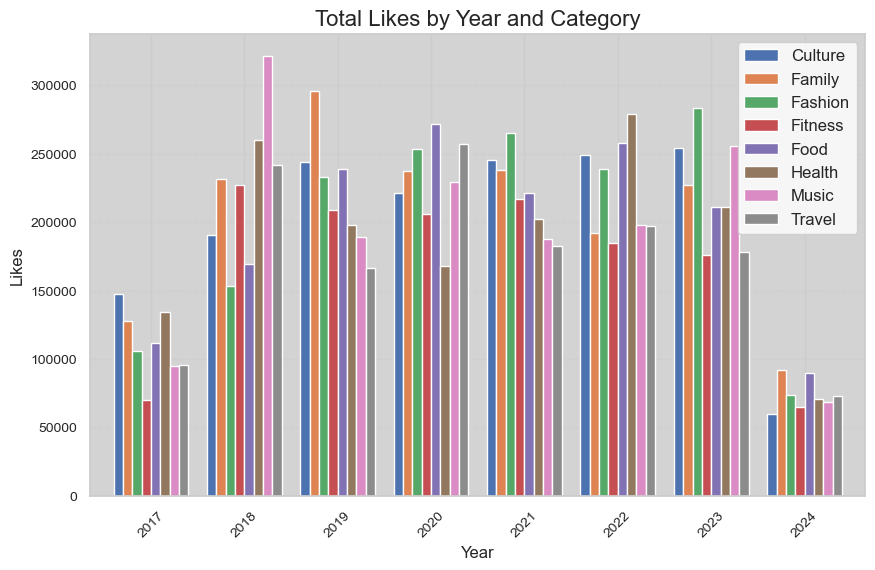

In [20]:
# Group the data by 'Year' and 'Category' and calculate the total likes for each combination
grouped_data = df.groupby(['Year', 'Category'])['Likes'].sum().reset_index()

# Pivot the data to create separate columns for each category
pivoted_data = grouped_data.pivot(index='Year', columns='Category', values='Likes')

# Set the figure size using subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot for each category
pivoted_data.plot(kind='bar', ax=ax, width=0.8)  # Adjust the width as needed

# Customize the plot
plt.title('Total Likes by Year and Category', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=12)

# Add a background color to the plot
ax.set_facecolor('lightgray')

# Show the plot
plt.show()

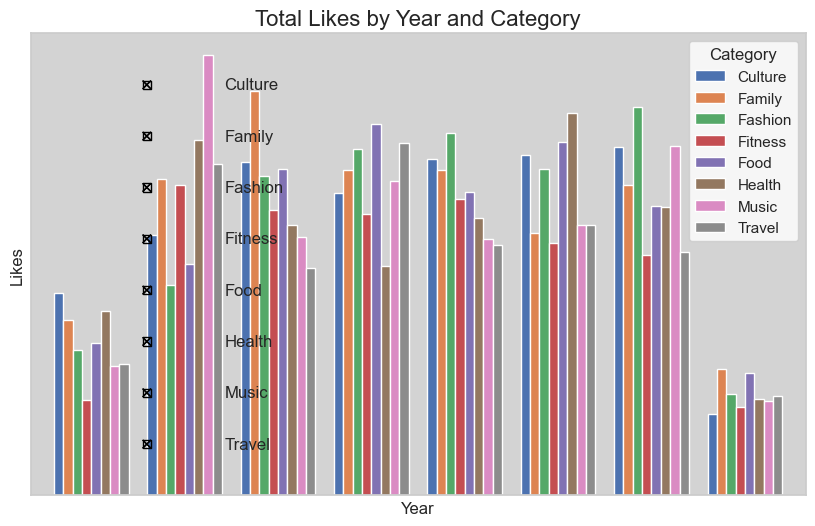

In [21]:
# Group the data by 'Year' and 'Category' and calculate the total likes for each combination
grouped_data = df.groupby(['Year', 'Category'])['Likes'].sum().reset_index()

# Pivot the data to create separate columns for each category
pivoted_data = grouped_data.pivot(index='Year', columns='Category', values='Likes')

# Set the figure size using subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot for each category
bars = pivoted_data.plot(kind='bar', ax=ax, width=0.8)  # Adjust the width as needed

# Customize the plot
plt.title('Total Likes by Year and Category', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a background color to the plot
ax.set_facecolor('lightgray')

# Create check buttons for each category
labels = list(pivoted_data.columns)
visibility = [True] * len(labels)
check = CheckButtons(ax, labels, visibility)

# Function to toggle visibility of categories
def toggle_visibility(label):
    index = labels.index(label)
    bars.get_children()[index].set_visible(not bars.get_children()[index].get_visible())
    plt.draw()

# Connect the check buttons to the toggle function
check.on_clicked(toggle_visibility)

# Show the plot
plt.show()

### Findings

The level of engagements for all categories are generally the same, with culture showing a very slight higher level.

2018 had, with a very narrow margin, the highest number of engagements.  For the other years, the engagement level were more or less the same (for a full year period) apart from 2017 which had the lowest number for a full year perios. The latter was because of the lfew access of technology and technology devices as compred to other years.  
The consistent engagement levels across categories suggest stability. While this may be positive in terms of maintaining a reliable audience, it’s essential to assess whether this consistency aligns with the client's goals. If they are aiming for growth or diversification, consider strategies to break out of this plateau.

### Conclusion

From the data it is clear that since 2018, there have been no signficant change in engagement levels. In this case, it is important to optimize contents futher using different formats. 
We should further analyze the client's engagement to understand whether such level of consistency is an industry trend or it is unique to us.
A/B testing can reveal subtle variations that resonate better.
Fresh ides could be:
User-Generated Content (UGC):
Encourage your audience to create content related to your brand or products. Run UGC campaigns, contests, or challenges. Showcase user-generated posts to build community and trust.
Embrace New Platforms and Features:
Explore emerging platforms (e.g., TikTok, Clubhouse) or new features (e.g., Instagram Reels, LinkedIn Stories). Early adoption can give you an edge.
Collaborations and Takeovers:
Partner with influencers, other brands, or even your own employees for takeovers. Cross-promotion introduces your content to new audiences.